In [2]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [3]:
data = yf.download(["AAPL", "GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"], start = "2010-01-01", end = "2020-12-31")

[*********************100%***********************]  6 of 6 completed


In [4]:
data.head()

Adj Close                                                         \
                AAPL     BAS.DE     BMW.DE     DBK.DE       GOOG     RWE.DE   
Date                                                                          
2009-12-31  6.426001        NaN        NaN        NaN  15.441621        NaN   
2010-01-04  6.526021  24.106213  19.280518  32.229897  15.610239  39.131065   
2010-01-05  6.537304  23.740728  19.436930  32.749935  15.541497  38.881397   
2010-01-06  6.433319  23.891222  19.737717  32.407471  15.149715  38.807625   
2010-01-07  6.421426  23.732662  19.912174  32.553337  14.797037  38.643059   

               Close                                   ...       Open  \
                AAPL     BAS.DE     BMW.DE     DBK.DE  ...     BMW.DE   
Date                                                   ...              
2009-12-31  7.526071        NaN        NaN        NaN  ...        NaN   
2010-01-04  7.643214  44.849998  32.049999  39.474529  ...  31.820000   
2010-01-05  7.656429  44.169998  32.310001  40.111465  ...  31.959999   
2010-01-06  7.534643  44.450001  32.810001  39.692020  ...  32.450001   
2010-01-07  7.520714  44.154999  33.099998  39.870674  ...  32.650002   

                                                  Volume             \
               DBK.DE       GOOG     RWE.DE         AAPL     BAS.DE   
Date                                                                  
2009-12-31        NaN  15.560426        NaN  352410800.0        NaN   
2010-01-04  38.837593  15.615220  68.222816  493729600.0  3245626.0   
2010-01-05  39.381317  15.620949  68.770988  601904800.0  3292371.0   
2010-01-06  39.909512  15.588072  68.202881  552160000.0  2345128.0   
2010-01-07  39.381317  15.178109  67.923813  477131200.0  2505352.0   

                                                          
               BMW.DE     DBK.DE         GOOG     RWE.DE  
Date                                                      
2009-12-31        NaN        NaN   48974884.0        NaN  
2010-01-04  1808170.0  4425924.0   78541293.0  2022078.0  
2010-01-05  1564182.0  5950810.0  120638494.0  2040667.0  
2010-01-06  2218604.0  5818935.0  159744526.0  1535087.0  
2010-01-07  2026145.0  4506202.0  257533695.0  1765257.0  

[5 rows x 36 columns]

In [5]:
data = data["Adj Close"]

In [6]:
data.head()

,AAPL,BAS.DE,BMW.DE,DBK.DE,GOOG,RWE.DE
Date,,,,,,
2009-12-31,6.426001,NaN,NaN,NaN,15.441621,NaN
2010-01-04,6.526021,24.106213,19.280518,32.229897,15.610239,39.131065
2010-01-05,6.537304,23.740728,19.436930,32.749935,15.541497,38.881397
2010-01-06,6.433319,23.891222,19.737717,32.407471,15.149715,38.807625
2010-01-07,6.421426,23.732662,19.912174,32.553337,14.797037,38.643059


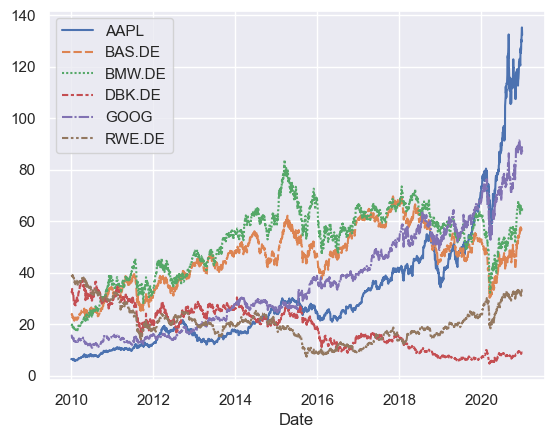

In [7]:
sns.lineplot(data = data);

In [8]:
data = pd.DataFrame(np.diff(np.log(data[1:]), axis=0) * 100, columns=data.columns)

In [9]:
data.head()

,AAPL,BAS.DE,BMW.DE,DBK.DE,GOOG,RWE.DE
0,0.172749,-1.527752,0.807972,1.600650,-0.441336,-0.640075
1,-1.603424,0.631904,1.535651,-1.051201,-2.553194,-0.189917
2,-0.185034,-0.665886,0.879996,0.449091,-2.355478,-0.424958
3,0.662632,-0.306205,-1.353524,3.578321,1.324303,-0.146929
4,-0.886076,-1.119367,-1.496368,-1.210318,-0.151272,1.169604


In [10]:
data = data.dropna(axis=0)

In [11]:
for i in range(0, data.shape[1]):
    data.iloc[:, i] = data.iloc[:, i][data.iloc[:, i].between(data.iloc[:, i].quantile(0.05), data.iloc[:, i].quantile(0.95))]

In [12]:
data = data.dropna(axis = 0)

In [13]:
data.head()

,AAPL,BAS.DE,BMW.DE,DBK.DE,GOOG,RWE.DE
0,0.172749,-1.527752,0.807972,1.600650,-0.441336,-0.640075
2,-0.185034,-0.665886,0.879996,0.449091,-2.355478,-0.424958
3,0.662632,-0.306205,-1.353524,3.578321,1.324303,-0.146929
4,-0.886076,-1.119367,-1.496368,-1.210318,-0.151272,1.169604
6,1.400689,0.936551,0.606451,-1.693962,-0.575764,-0.220489


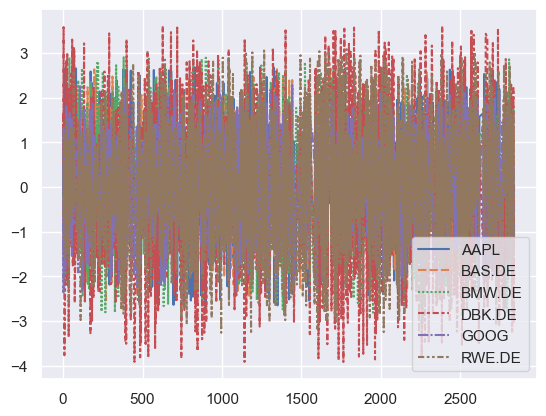

In [14]:
sns.lineplot(data = data);

<AxesSubplot:ylabel='AAPL'>

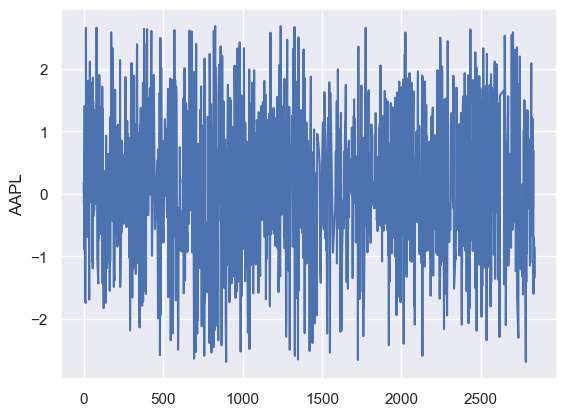

In [15]:
sns.lineplot(data = data.AAPL)

In [147]:
m, n = data.shape

In [16]:
mu = np.mean(data)
Cov = np.cov(data, rowvar=0)
C1 = np.linalg.inv(Cov)

c:\Users\morit\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [148]:
a = mu.T.dot(C1).dot(mu)
b = np.ones([1,n]).dot(C1).dot(mu)
d = np.ones([1,n]).dot(C1).dot(np.ones([n,1]))

In [149]:
n_PFs = 100

In [150]:
w = np.random.random([n_PFs,n])


In [118]:
for i in range(0, n_PFs):
    w[i] = w[i] / w[i].sum()

In [140]:
w[0][0]*data.AAPL[:]

0       0.014803
2      -0.015856
3       0.056783
4      -0.075930
6       0.120029
          ...   
2830    0.059464
2831   -0.136917
2834   -0.059988
2837   -0.114865
2838   -0.073380
Name: AAPL, Length: 1692, dtype: float64

In [146]:
w[0][0]*data.iloc[:,0]

0       0.014803
2      -0.015856
3       0.056783
4      -0.075930
6       0.120029
          ...   
2830    0.059464
2831   -0.136917
2834   -0.059988
2837   -0.114865
2838   -0.073380
Name: AAPL, Length: 1692, dtype: float64

In [136]:
w[0][0]

0.08569267402460634

In [137]:
0.085 * 0.172

0.01462

In [163]:
w[0] * data.iloc[0]

AAPL      0.073217
BAS.DE   -0.025161
BMW.DE    0.670525
DBK.DE    1.066872
GOOG     -0.359685
RWE.DE   -0.132932
Name: 0, dtype: float64

In [164]:
np.cov(w[0] * data)

array([[ 0.29245744,  0.34716851,  0.17412057, ...,  0.31919347,
        -0.2650887 ,  0.03920105],
       [ 0.34716851,  0.82644204, -0.34747031, ...,  0.26161019,
         0.00700655,  0.11074283],
       [ 0.17412057, -0.34747031,  1.41599842, ...,  0.15233469,
        -0.75249688,  0.26125933],
       ...,
       [ 0.31919347,  0.26161019,  0.15233469, ...,  0.54779835,
        -0.30490295, -0.08024283],
       [-0.2650887 ,  0.00700655, -0.75249688, ..., -0.30490295,
         0.54901508, -0.06810303],
       [ 0.03920105,  0.11074283,  0.26125933, ..., -0.08024283,
        -0.06810303,  0.21112678]])

In [165]:
PFReturns = np.empty_like(w)

In [ ]:
for i in range(0, w.shape[0]):
    PFReturns


In [166]:
w.shape

(100, 6)

In [161]:
data.iloc[:,0]

0       0.172749
2      -0.185034
3       0.662632
4      -0.886076
6       1.400689
          ...   
2830    0.693917
2831   -1.597770
2834   -0.700040
2837   -1.340433
2838   -0.856318
Name: AAPL, Length: 1692, dtype: float64

In [131]:
data.iloc[0]

AAPL      0.172749
BAS.DE   -1.527752
BMW.DE    0.807972
DBK.DE    1.600650
GOOG     -0.441336
RWE.DE   -0.640075
Name: 0, dtype: float64

In [106]:
returns_test = np.empty_like(w)

In [151]:
data.shape[1]

6

In [152]:
for i in range(0, n_PFs):
    for j in range(0, n):
        returns_test[i,j] = w[i,j] * data.iloc[i,j]

In [153]:
returns_mean = returns_test.mean(axis=1)
returns_std = returns_test.std(axis = 1)

In [154]:
results = pd.DataFrame([returns_mean, returns_std]).T


In [155]:
results.columns = ["mean", "std"]

In [156]:
results.head()

,mean,std
0,0.215473,0.493675
1,-0.336099,0.710383
2,0.253589,0.921340
3,-0.202188,0.497756
4,0.146267,0.441262


In [157]:
results.shape

(100, 2)

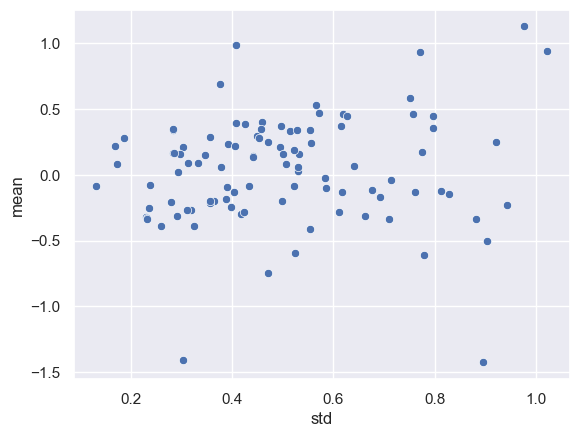

In [158]:
sns.scatterplot(y = results["mean"], x = results["std"]);